In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Datasets/charging-stations (1).xlsx')

In [ ]:
df1.replace("Andaman & Nicobar", "Andaman and Nicobar Islands", inplace=True)
df1.replace("Jammu & Kashmir", "Jammu and Kashmir", inplace = True)
df1.head()

,State Name,No.of Operational Public Charging Stations
0,Andaman and Nicobar Islands,3
1,Andhra Pradesh,222
2,Arunachal Pradesh,9
3,Assam,48
4,Bihar,83


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/states_data_car.csv')
df2.head()

,state,capital,subsidy,road tax,petrol,diesel
0,Andhra Pradesh,Amaravati,0.0,1.0,111.65,99.41
1,Arunachal Pradesh,Itanagar,5000.0,0.0,95.89,84.81
2,Assam,Dispur,10000.0,1.0,96.34,84.24
3,Bihar,Patna,10000.0,1.0,109.17,95.82
4,Chhattisgarh,Raipur,5000.0,0.0,102.98,95.96


In [ ]:
df = pd.merge(left=df1, right=df2, how='left', left_on='State Name', right_on='state')
df.head()

,State Name,No.of Operational Public Charging Stations,state,capital,subsidy,road tax,petrol,diesel
0,Andaman and Nicobar Islands,3,Andaman and Nicobar Islands,Port Blair,0.0,0.0,84.10,79.74
1,Andhra Pradesh,222,Andhra Pradesh,Amaravati,0.0,1.0,111.65,99.41
2,Arunachal Pradesh,9,Arunachal Pradesh,Itanagar,5000.0,0.0,95.89,84.81
3,Assam,48,Assam,Dispur,10000.0,1.0,96.34,84.24
4,Bihar,83,Bihar,Patna,10000.0,1.0,109.17,95.82


In [ ]:
df.to_csv('Merged_EV.csv')

In [ ]:
df = df.drop('state', axis = 1)
df = df.drop('capital', axis = 1)
df.head()

,State Name,No.of Operational Public Charging Stations,subsidy,road tax,petrol,diesel
0,Andaman and Nicobar Islands,3,0.0,0.0,84.10,79.74
1,Andhra Pradesh,222,0.0,1.0,111.65,99.41
2,Arunachal Pradesh,9,5000.0,0.0,95.89,84.81
3,Assam,48,10000.0,1.0,96.34,84.24
4,Bihar,83,10000.0,1.0,109.17,95.82


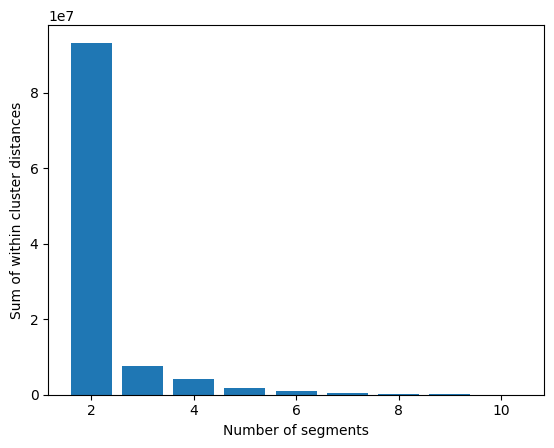

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
distortions = []
for k in range(2,11):
    kmeanModel = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeanModel.fit(df[['No.of Operational Public Charging Stations', 'subsidy','road tax', 'petrol', 'diesel']].dropna())
    distortions.append(kmeanModel.inertia_)
plt.bar(range(2,11), distortions)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within cluster distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

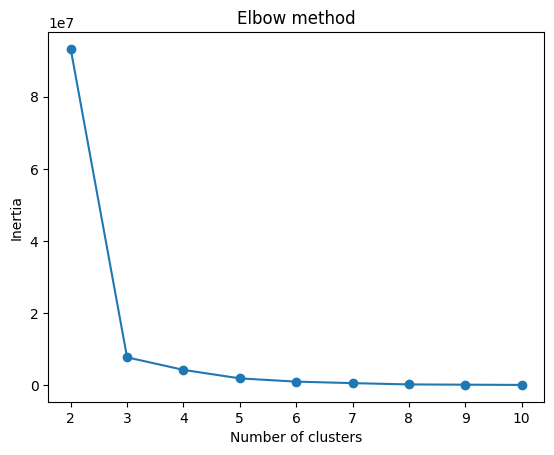

In [ ]:
inertias = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['No.of Operational Public Charging Stations', 'subsidy','road tax', 'petrol', 'diesel']].dropna())
    inertias.append(kmeans.inertia_)

plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[['No.of Operational Public Charging Stations', 'subsidy','road tax', 'petrol', 'diesel']].dropna())
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df = df.dropna()
df['labels'] = labels
df.head()

<ipython-input-43-6d5e0f4e7b18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = labels


,State Name,No.of Operational Public Charging Stations,subsidy,road tax,petrol,diesel,labels
0,Andaman and Nicobar Islands,3,0.0,0.0,84.10,79.74,0
1,Andhra Pradesh,222,0.0,1.0,111.65,99.41,0
2,Arunachal Pradesh,9,5000.0,0.0,95.89,84.81,2
3,Assam,48,10000.0,1.0,96.34,84.24,1
4,Bihar,83,10000.0,1.0,109.17,95.82,1


In [ ]:
cluster1 = df[df['labels']==0].drop(columns = 'labels', axis = 1)
cluster2 = df[df['labels']==1].drop(columns = 'labels', axis = 1)
cluster3 = df[df['labels']==2].drop(columns = 'labels', axis = 1)

In [ ]:
print(cluster1['State Name'])
cluster1.describe()

0     Andaman and Nicobar Islands
1                  Andhra Pradesh
10                        Haryana
12              Jammu and Kashmir
14                      Karnataka
15                         Kerala
16                    Lakshadweep
17                 Madhya Pradesh
22                         Odisha
24                         Punjab
26                         Sikkim
27                     Tamil Nadu
28                      Telangana
31                  Uttar Pradesh
32                    Uttarakhand
Name: State Name, dtype: object


,No.of Operational Public Charging Stations,subsidy,road tax,petrol,diesel
count,15.000000,15.0,15.000000,15.000000,15.000000
mean,203.733333,0.0,0.549333,102.126667,92.511333
std,201.468348,0.0,0.483003,7.407507,5.777981
min,1.000000,0.0,0.000000,84.100000,79.740000
25%,36.000000,0.0,0.000000,96.810000,89.050000
50%,174.000000,0.0,0.750000,102.850000,95.180000
75%,298.500000,0.0,1.000000,107.080000,96.220000
max,704.000000,0.0,1.000000,111.970000,99.970000


In [ ]:
print(cluster2['State Name'])
cluster2.describe()

3           Assam
4           Bihar
7           Delhi
8             Goa
9         Gujarat
33    West Bengal
Name: State Name, dtype: object


,No.of Operational Public Charging Stations,subsidy,road tax,petrol,diesel
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,400.666667,9666.666667,0.916667,100.555000,90.958333
std,710.731642,816.496581,0.204124,5.823596,3.970760
min,44.000000,8000.000000,0.500000,96.340000,84.240000
25%,56.750000,10000.000000,1.000000,96.547500,89.807500
50%,136.000000,10000.000000,1.000000,97.270000,91.300000
75%,193.500000,10000.000000,1.000000,104.547500,93.160000
max,1845.000000,10000.000000,1.000000,109.170000,95.820000


In [ ]:
print(cluster3['State Name'])
cluster3.describe()

2     Arunachal Pradesh
5            Chandigarh
6          Chhattisgarh
11     Himachal Pradesh
13            Jharkhand
18          Maharashtra
19              Manipur
20            Meghalaya
21             Nagaland
29              Tripura
Name: State Name, dtype: object


,No.of Operational Public Charging Stations,subsidy,road tax,petrol,diesel
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,86.700000,4900.000000,0.300000,99.522000,88.217000
std,202.201797,316.227766,0.483046,4.852749,5.314774
min,6.000000,4000.000000,0.000000,95.060000,81.990000
25%,10.750000,5000.000000,0.000000,95.967500,84.397500
50%,18.500000,5000.000000,0.000000,98.430000,86.905000
75%,41.250000,5000.000000,0.750000,100.937500,93.040000
max,660.000000,5000.000000,1.000000,111.180000,95.960000


We can see that the average number of charging stations are more in cluster 2, and it will be easier for the startup to target these states.
Government subsidy is also more in cluster 2, which will give an incentive for the peeple to buy EVs, which makes the states suitable for a entry point for a new EV startup.
Again if we look at the mean values of Road Tax, petrol price, diesel price, cluster 3 has the least valuse, which drives the publuc sentiment to push towards electric Vehicles.